
#lode data
*   load
*   clean



In [2]:
import pandas as pd

df = pd.read_csv('cats.csv')

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})


#normalize

In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[['Bwt', 'Hwt']])

normalized_df = pd.DataFrame(normalized_data, columns=['Bwt', 'Hwt'])


In [4]:
df_norm = pd.concat([df['Gender'], normalized_df], axis=1)

#divide to test and trian

In [12]:
from sklearn.model_selection import train_test_split

y = df_norm['Gender']
X = df_norm[['Bwt', 'Hwt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

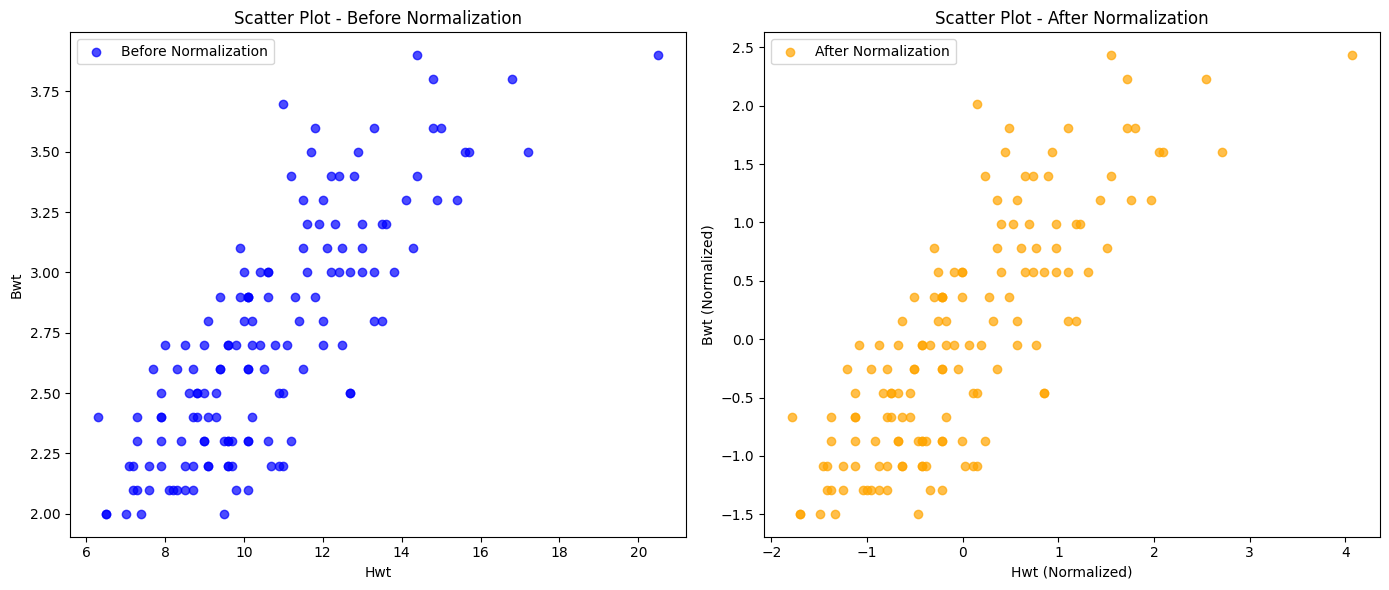

In [13]:
import matplotlib.pyplot as plt

# Assuming df and normalized_df are already defined

plt.figure(figsize=(14, 6))

# Plot before normalization
plt.subplot(1, 2, 1)
plt.scatter(df['Hwt'], df['Bwt'], color='blue', alpha=0.7, label='Before Normalization')
plt.title('Scatter Plot - Before Normalization')
plt.xlabel('Hwt')
plt.ylabel('Bwt')
plt.legend()

# Plot after normalization
plt.subplot(1, 2, 2)
plt.scatter(normalized_df['Hwt'], normalized_df['Bwt'], color='orange', alpha=0.7, label='After Normalization')
plt.title('Scatter Plot - After Normalization')
plt.xlabel('Hwt (Normalized)')
plt.ylabel('Bwt (Normalized)')
plt.legend()

plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()


# make arry

1.    c array
2.    gamma



In [14]:
import numpy as np
C = np.logspace(-2, 5, 8)
Gamma = np.logspace(-6, 1, 16)

#use svm

> we use  svm from sklearn to peredict



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {'C': C, 'gamma': Gamma}


In [16]:
y = df_norm['Gender']
X = df_norm[['Bwt', 'Hwt']]
grid1 = GridSearchCV(SVC(kernel='linear'), param_grid)
grid1.fit(X_train, y_train)


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'gamma': array([1.00000000e-06, 2.92864456e-06, 8.57695899e-06, 2.51188643e-05,
       7.35642254e-05, 2.15443469e-04, 6.30957344e-04, 1.84784980e-03,
       5.41169527e-03, 1.58489319e-02, 4.64158883e-02, 1.35935639e-01,
       3.98107171e-01, 1.16591440e+00, 3.41454887e+00, 1.00000000e+01])})

In [17]:
print("The  parameters  %s  a score of %0.2f" % (grid1.best_params_, grid1.best_score_))


The  parameters  {'C': 100000.0, 'gamma': 1e-06}  a score of 0.77


# use svm
this part we use svm with gusian kernel

In [18]:
grid2 = GridSearchCV(SVC(kernel='rbf'), param_grid)
grid2.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f" % (grid2.best_params_, grid2.best_score_))

The best parameters are {'C': 1.0, 'gamma': 10.0} with a score of 0.79


 برای این  استفاده از مدل گوسین نتیجه بهتر میدهد چون می اید و با استفاده از کرنل  ویزگی هایه کوادراتیک را در نظر میگرد و این امر باعث می شود که مدل هایی که باخط تفکیک بذیر نستن را تفکیک بذیر کند

In [19]:
from sklearn.metrics import accuracy_score

clf1 = SVC(kernel='linear', C=grid1.best_params_['C'], gamma=grid1.best_params_['gamma'])
clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
print("accuracy  linear kernel:", accuracy1)

accuracy  linear kernel: 0.8620689655172413


test model on test data

In [20]:
clf2 = SVC(kernel='rbf', C=grid2.best_params_['C'], gamma=grid2.best_params_['gamma'])
clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy using guassian kernel:", accuracy2)

Accuracy using guassian kernel: 0.7241379310344828
